<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

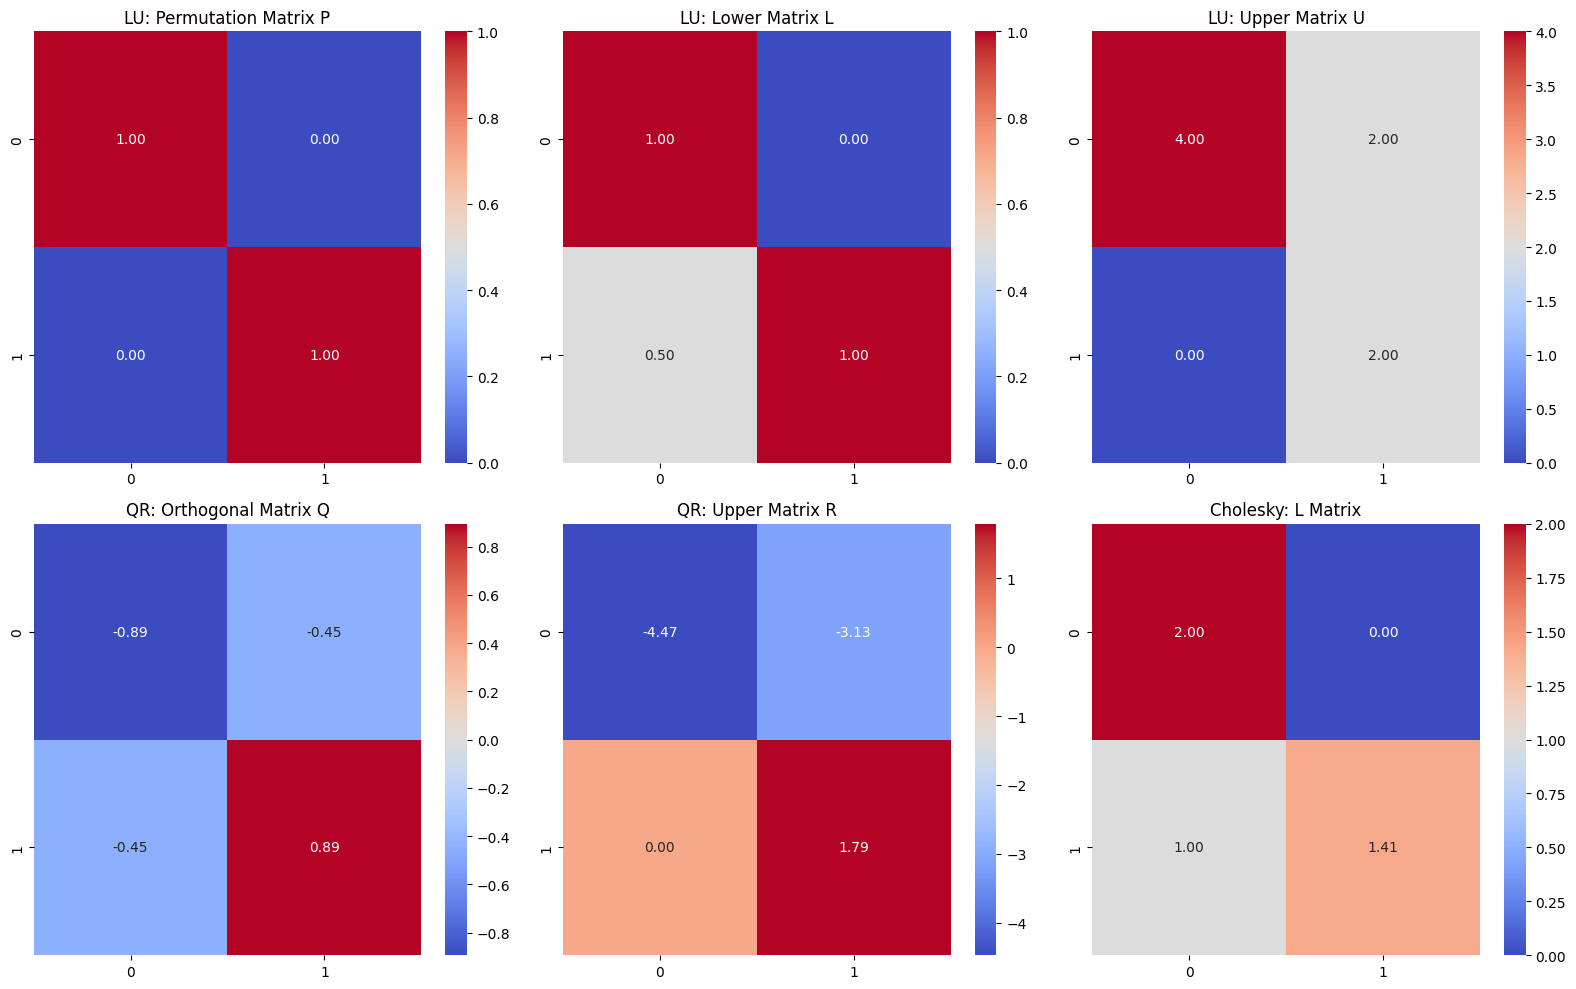

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

# Function for LU decomposition
def lu_decomposition(A):
    """Return P, L, U matrices using SciPy's LU decomposition."""
    P, L, U = la.lu(A)
    return P, L, U

# Function for QR decomposition
def qr_decomposition(A):
    """Return Q, R matrices from QR decomposition."""
    Q, R = np.linalg.qr(A)
    return Q, R

# Function for Cholesky decomposition
def cholesky_decomposition(A):
    """Return lower-triangular L such that A = L @ L.T"""
    L = np.linalg.cholesky(A)
    return L

# Function to visualize matrices using heatmaps
def plot_matrix(matrix, title="Matrix", ax=None):
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax)
    ax.set_title(title)

# Function to compare decompositions
def visualize_decompositions(A):
    fig, axs = plt.subplots(2, 3, figsize=(16, 10))

    # LU Decomposition
    try:
        P, L_lu, U = lu_decomposition(A)
        plot_matrix(P, title="LU: Permutation Matrix P", ax=axs[0, 0])
        plot_matrix(L_lu, title="LU: Lower Matrix L", ax=axs[0, 1])
        plot_matrix(U, title="LU: Upper Matrix U", ax=axs[0, 2])
    except Exception as e:
        axs[0, 0].text(0.5, 0.5, 'LU Error', ha='center', va='center')
        print(f"LU Error: {e}")

    # QR Decomposition
    try:
        Q, R = qr_decomposition(A)
        plot_matrix(Q, title="QR: Orthogonal Matrix Q", ax=axs[1, 0])
        plot_matrix(R, title="QR: Upper Matrix R", ax=axs[1, 1])
    except Exception as e:
        axs[1, 0].text(0.5, 0.5, 'QR Error', ha='center', va='center')
        print(f"QR Error: {e}")

    # Cholesky Decomposition (only for positive-definite matrices)
    if np.all(np.linalg.eigvals(A) > 0):
        try:
            L_chol = cholesky_decomposition(A)
            plot_matrix(L_chol, title="Cholesky: L Matrix", ax=axs[1, 2])
        except Exception as e:
            axs[1, 2].text(0.5, 0.5, 'Cholesky Error', ha='center', va='center')
            print(f"Cholesky Error: {e}")
    else:
        axs[1, 2].text(0.5, 0.5, 'Not Positive Definite', ha='center', va='center', fontsize=12)

    plt.tight_layout()
    plt.show()

# Example matrix (positive definite for Cholesky)
A = np.array([[4, 2], [2, 3]])

# Visualize the decompositions
visualize_decompositions(A)


| Decomposition | Stability                    | Complexity | Use Case                                           |
| ------------- | ---------------------------- | ---------- | -------------------------------------------------- |
| **LU**        | Medium (depends on pivoting) | O(n³)      | Solving linear systems                             |
| **QR**        | More numerically stable      | O(n³)      | Least squares, orthogonalization                   |
| **Cholesky**  | Very stable if valid         | \~½ O(n³)  | Fast solving of SPD systems (e.g., Kalman filters) |
